Another file for visualize the dataset/generated data

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

directory = 'Colab Notebooks/FYP/data/'  # Change this to your path
import os
import numpy as np
unzipped_directory2 = '/content/drive/MyDrive/Colab Notebooks/FYP/data/alotofzipped/hairpin-traces-main'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the .npy file
#import numpy as np
ext2 = np.load('/content/drive/MyDrive/Colab Notebooks/FYP/data/extracted_data2.npy', allow_pickle=True)



In [ ]:
# Filter out samples where the final feature ever exceeds 0.5
ext2 = ext2[np.all(ext2[:, :, -1] <= 0.92, axis=1)]

print(f"New shape of ext2 after filtering: {ext2.shape}")

New shape of ext2 after filtering: (401, 30000, 3)


In [ ]:
#FOR  extration

unzipped_directory2 = '/content/drive/MyDrive/Colab Notebooks/FYP/data/alotofzipped/hairpin-traces-main'
log_lengths = []
for root, dirs, files in os.walk(unzipped_directory2):
    for file in files:
        if file.endswith('.log'):
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                log_lengths.append(len(f.readlines()))



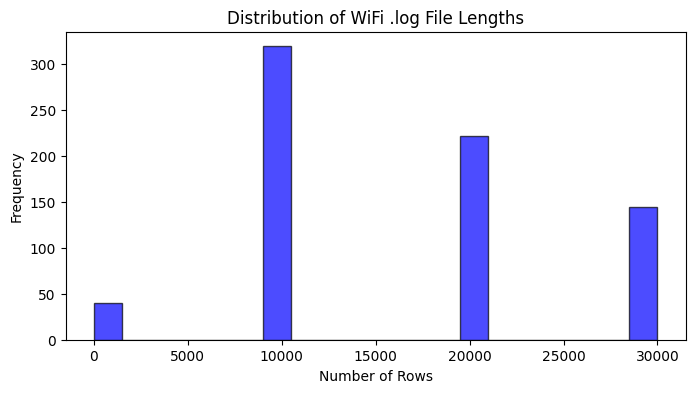

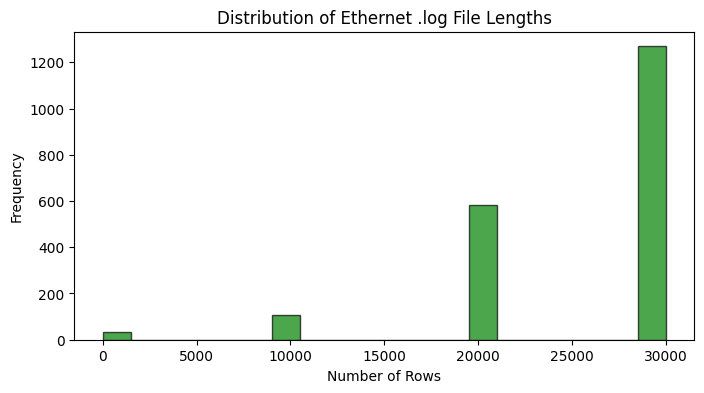

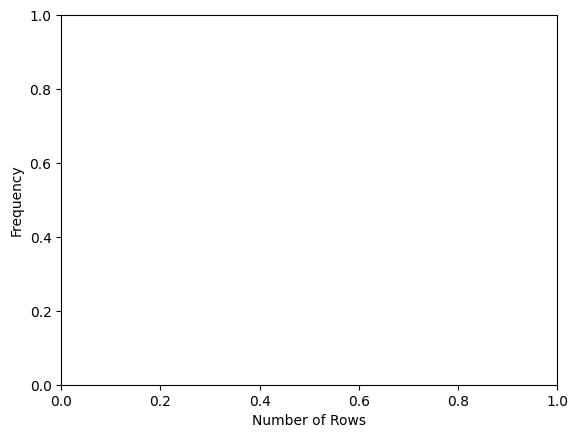

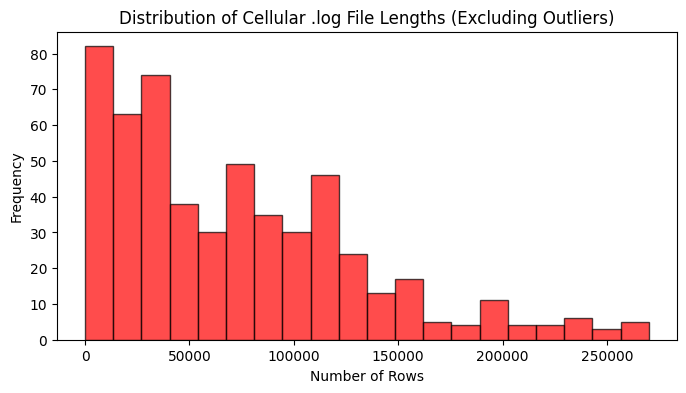

In [ ]:
# Display the length distribution
import matplotlib.pyplot as plt

# Count the occurrences of each type of name
wifi_lengths = [length for file, length in zip(files, log_lengths) if file.startswith('wifi')]
eth_lengths = [length for file, length in zip(files, log_lengths) if file.startswith('eth')]
cell_lengths = [length for file, length in zip(files, log_lengths) if file.startswith('cell')]

# Plot WiFi distribution
plt.figure(figsize=(8, 4))
plt.hist(wifi_lengths, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of WiFi .log File Lengths')
plt.xlabel('Number of Rows')
plt.ylabel('Frequency')
plt.show()

# Plot Ethernet distribution
plt.figure(figsize=(8, 4))
plt.hist(eth_lengths, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of Ethernet .log File Lengths')
plt.xlabel('Number of Rows')
plt.ylabel('Frequency')
plt.show()

# Plot Cellular distribution
plt.xlabel('Number of Rows')
plt.ylabel('Frequency')
# Focus the graph on the major data by excluding outliers for Cellular distribution
cell_threshold = np.percentile(cell_lengths, 95)
filtered_cell_lengths = [length for length in cell_lengths if length <= cell_threshold]

plt.figure(figsize=(8, 4))
plt.hist(filtered_cell_lengths, bins=20, alpha=0.7, color='red', edgecolor='black')
plt.title('Distribution of Cellular .log File Lengths (Excluding Outliers)')
plt.xlabel('Number of Rows')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Print the number of samples for each type
print(f"Number of WiFi samples: {len(wifi_lengths)}")
print(f"Number of Ethernet samples: {len(eth_lengths)}")
print(f"Number of Cellular samples: {len(cell_lengths)}")

Number of WiFi samples: 725
Number of Ethernet samples: 1988
Number of Cellular samples: 571


In [ ]:
eth_30000_count = sum(1 for length in eth_lengths if length == 30000)
print(f"Number of Ethernet samples with exactly 30,000 rows: {eth_30000_count}")
wifi_30000_count = sum(1 for length in wifi_lengths if length == 30000)
print(f"Number of Ethernet samples with exactly 30,000 rows: {wifi_30000_count}")
cell_30000_count = sum(1 for length in cell_lengths if length == 30000)
print(f"Number of Ethernet samples with exactly 30,000 rows: {cell_30000_count}")

Number of Ethernet samples with exactly 30,000 rows: 1269
Number of Ethernet samples with exactly 30,000 rows: 144
Number of Ethernet samples with exactly 30,000 rows: 37


In [ ]:
#output_numpy_file = '/content/drive/MyDrive/Colab Notebooks/FYP/data/extracted_data3.npy'

In [ ]:
import os
# Ensure files_with_30000_rows is defined
files_with_30000_rows = []
for root, dirs, files in os.walk(unzipped_directory2):
    for file in files:
        if file.startswith('eth') and file.endswith('.log'):
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                if len(lines) == 30000:
                    files_with_30000_rows.append(file_path)
output_numpy_file = '/content/drive/MyDrive/Colab Notebooks/FYP/data/extracted_data3.npy'

# Initialize an empty list to store the data
data_list = []

# Process each file with 30,000 rows
for file_path in files_with_30000_rows:
    with open(file_path, 'r') as f:
        # Read the file and parse its content
        lines = f.readlines()
        # Assuming each line contains 3 columns separated by spaces or tabs
        file_data = [
            [float(value.replace('ms', '').replace('Mbps', '').strip()) for value in line.strip().split()]
            for line in lines
        ]
        data_list.append(file_data)


In [ ]:
ext2=np.array(data_list, dtype=float)
print(ext2.shape)

(1269, 30000, 3)


In [ ]:
print(np.max(ext2[0,:,2]))

0.93


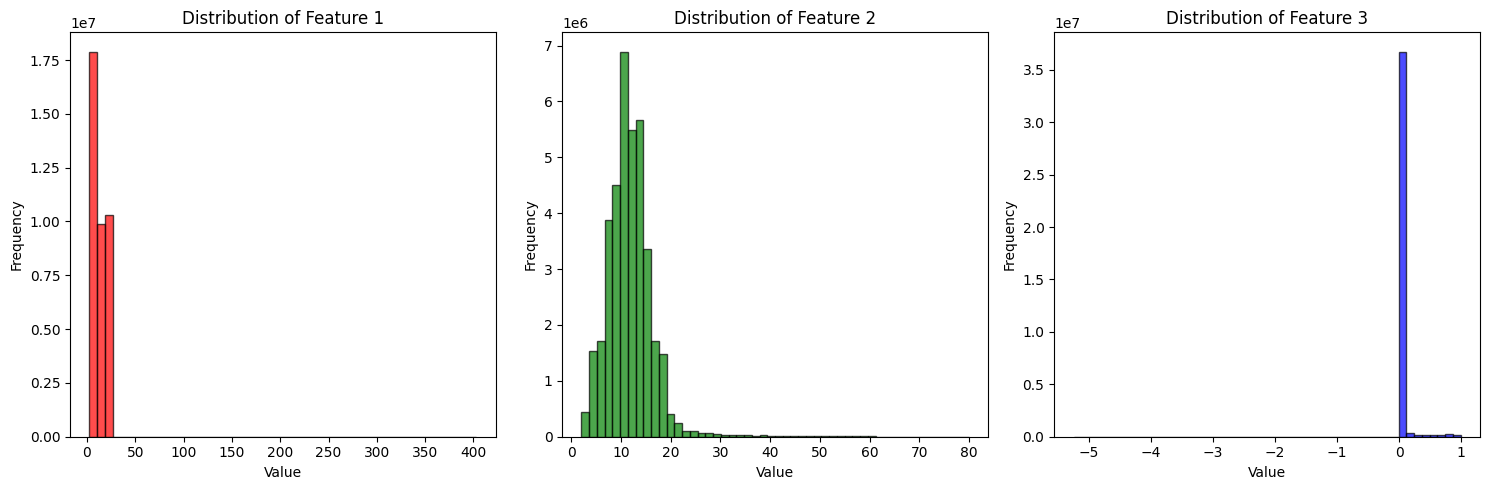

In [ ]:
# Plot the distribution of each feature in ext2
plt.figure(figsize=(15, 5))

# Feature 1
plt.subplot(1, 3, 1)
plt.hist(ext2[:, :, 0].flatten(), bins=50, color='red', alpha=0.7, edgecolor='black')
plt.title('Distribution of Feature 1')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Feature 2
plt.subplot(1, 3, 2)
plt.hist(ext2[:, :, 1].flatten(), bins=50, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Feature 2')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Feature 3
plt.subplot(1, 3, 3)
plt.hist(ext2[:, :, 2].flatten(), bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Feature 3')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Check if any value in feature 0 is less than or equal to 0
feature_0_below_or_equal_zero = np.any(ext2[:, :, 0] <= 0)

print(f"Are there any samples in feature 0 below or equal to 0? {feature_0_below_or_equal_zero}")

Are there any samples in feature 0 below or equal to 0? False


In [ ]:
np.save(output_numpy_file, ext2)
print(f"Data saved to: {output_numpy_file}")


Data saved to: /content/drive/MyDrive/Colab Notebooks/FYP/data/extracted_data3.npy


In [ ]:
# Load the .npy file
loaded_data = np.load('/content/drive/MyDrive/Colab Notebooks/FYP/data/extracted_data2.npy', allow_pickle=True)


In [ ]:

# Display the loaded data
print(loaded_data.shape)

(1269, 30000, 3)


In [ ]:
loaded_data

array([[[12.48, 10.0, 0.0],
        [8.11, 12.5, 0.0],
        [12.48, 10.0, 0.0],
        ...,
        [24.34, 12.2, 0.0],
        [24.34, 12.9, 0.0],
        [24.34, 12.5, 0.0]],

       [[8.11, 6.9, 0.0],
        [12.48, 8.0, 0.5],
        [6.24, 4.0, 0.0],
        ...,
        [18.72, 6.9, 0.0],
        [5.62, 9.2, 0.0],
        [18.72, 6.2, 0.0]],

       [[20.59, 8.5, 0.48],
        [3.12, 6.5, 0.0],
        [3.12, 7.0, 0.0],
        ...,
        [3.12, 8.0, 0.0],
        [14.98, 10.6, 0.0],
        [3.12, 6.0, 0.0]],

       ...,

       [[2.72, 37.0, 0.0],
        [2.5, 35.0, 0.0],
        [2.5, 43.0, 0.0],
        ...,
        [2.5, 50.0, 0.0],
        [2.5, 48.0, 0.0],
        [3.08, 57.0, 0.0]],

       [[2.5, 51.0, 0.0],
        [2.5, 36.0, 0.0],
        [2.5, 38.0, 0.0],
        ...,
        [2.52, 46.0, 0.0],
        [2.5, 41.0, 0.0],
        [2.5, 55.0, 0.0]],

       [[3.18, 60.0, 0.0],
        [2.59, 45.0, 0.0],
        [7.33, 49.0, 0.0],
        ...,
        [2.5, 25.

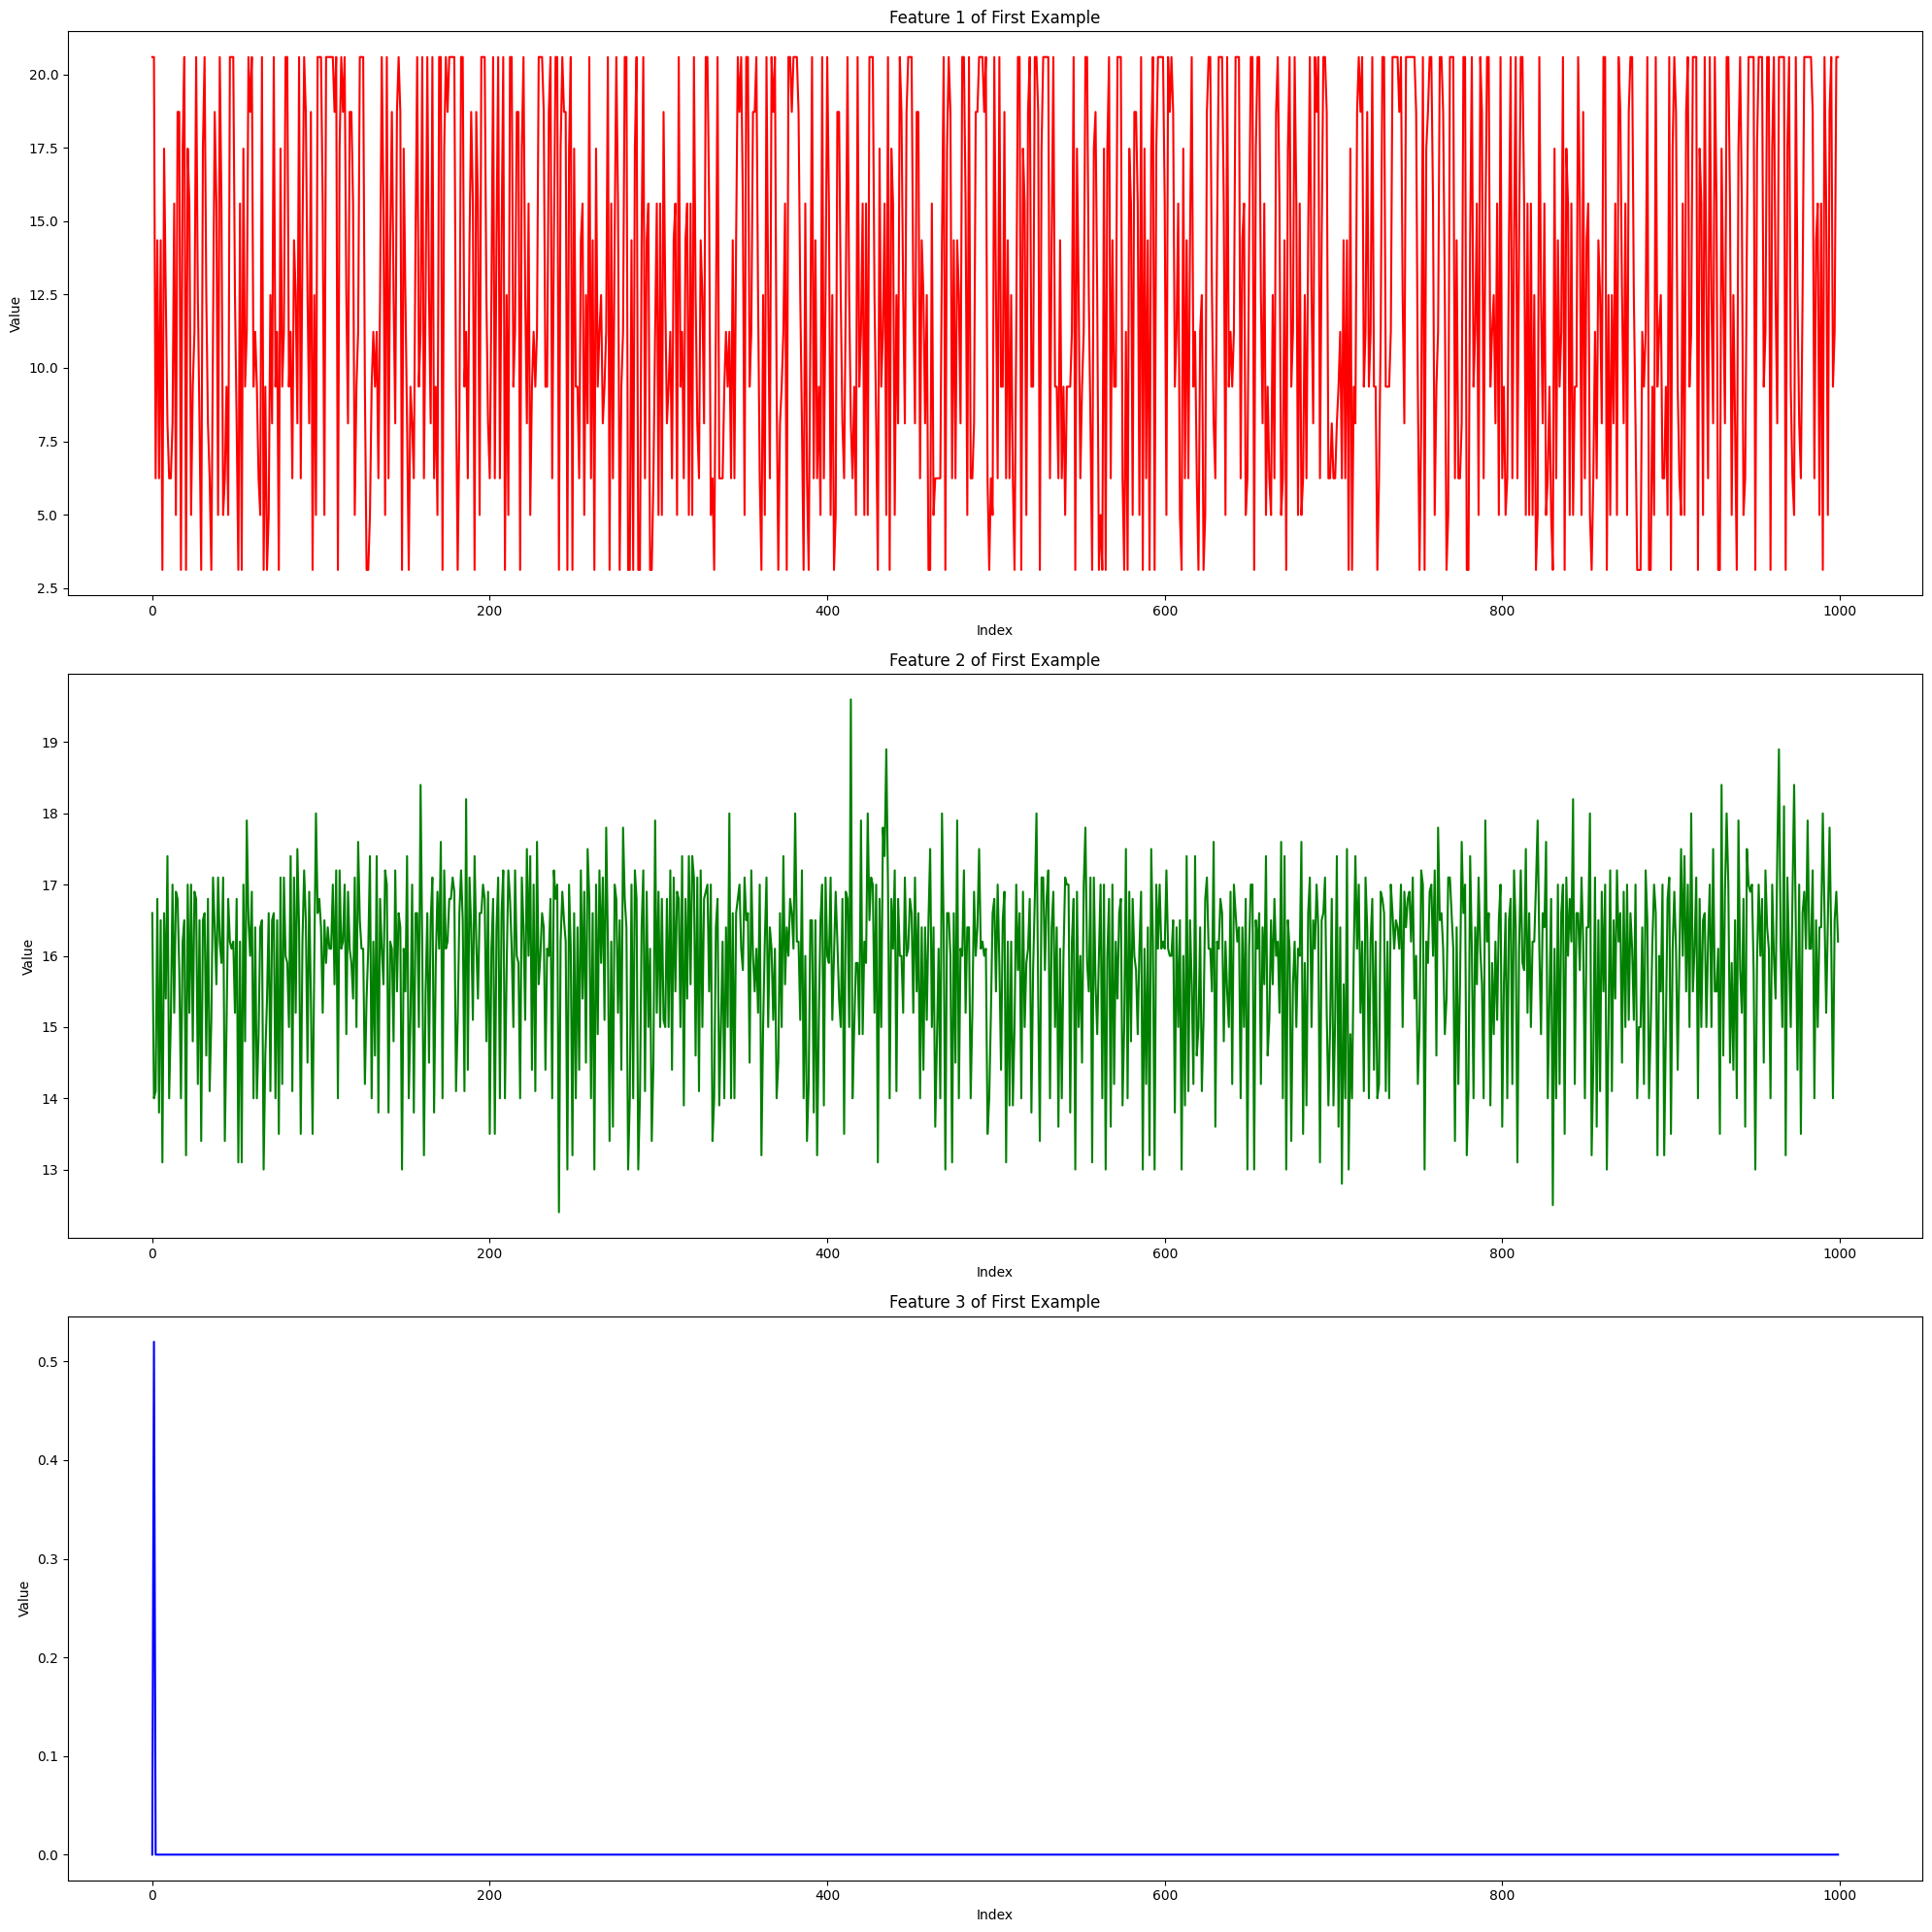

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

# Plot the three features of the first example
plt.figure(figsize=(20, 20))

#for loaded data
#loaded_data[x, :100, 0]

x=100
to_see0=loaded_data[x, :1000, 0]
to_see1=loaded_data[x, :1000, 1]
to_see2=loaded_data[x, :1000, 2]


# Feature 1
plt.subplot(3, 1, 1)
plt.plot(  to_see0   , label='Feature 1', color='r')
plt.title('Feature 1 of First Example')
plt.xlabel('Index')
plt.ylabel('Value')

# Feature 2
plt.subplot(3, 1, 2)
plt.plot( to_see1 , label='Feature 2', color='g')
plt.title('Feature 2 of First Example')
plt.xlabel('Index')
plt.ylabel('Value')

# Feature 3
plt.subplot(3, 1, 3)
plt.plot( to_see2 , label='Feature 3', color='b')
plt.title('Feature 3 of First Example')
plt.xlabel('Index')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

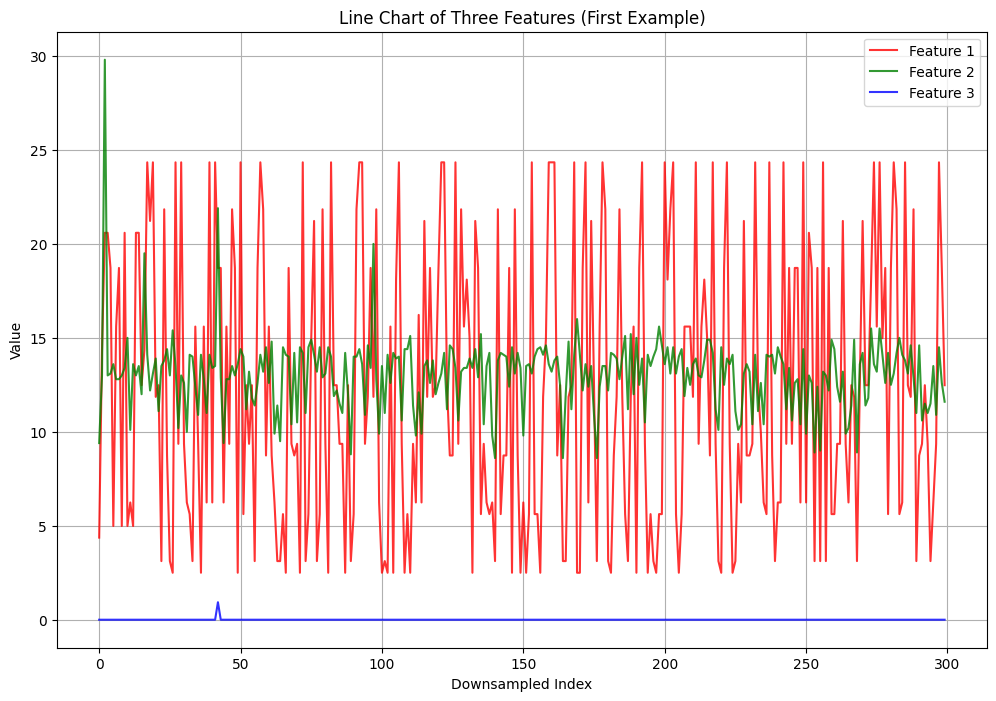

In [ ]:
# Downsample the data for better visualization
downsample_rate = 100  # Plot every 100th point
downsampled_data = loaded_data[50, ::downsample_rate, :]

# Line chart for the three features of the first example
plt.figure(figsize=(12, 8))

plt.plot(downsampled_data[:, 0], label='Feature 1', color='r', alpha=0.8)
plt.plot(downsampled_data[:, 1], label='Feature 2', color='g', alpha=0.8)
plt.plot(downsampled_data[:, 2], label='Feature 3', color='b', alpha=0.8)

plt.title('Line Chart of Three Features (First Example)')
plt.xlabel('Downsampled Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


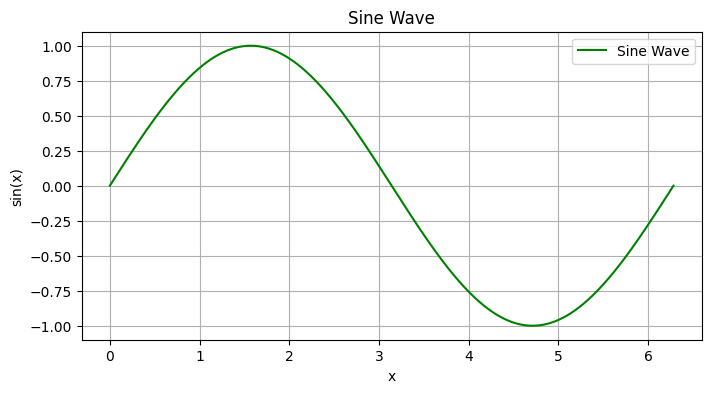

In [ ]:
num_points = 1000  # Number of discrete points
x = np.linspace(0, 2 * np.pi, num_points)  # Generate equally spaced points over one cycle
sin = np.sin(x)  # Compute sine values




# Plot the sine wave
plt.figure(figsize=(8, 4))
plt.plot(x, sin, label='Sine Wave', color='green')
plt.title('Sine Wave')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()


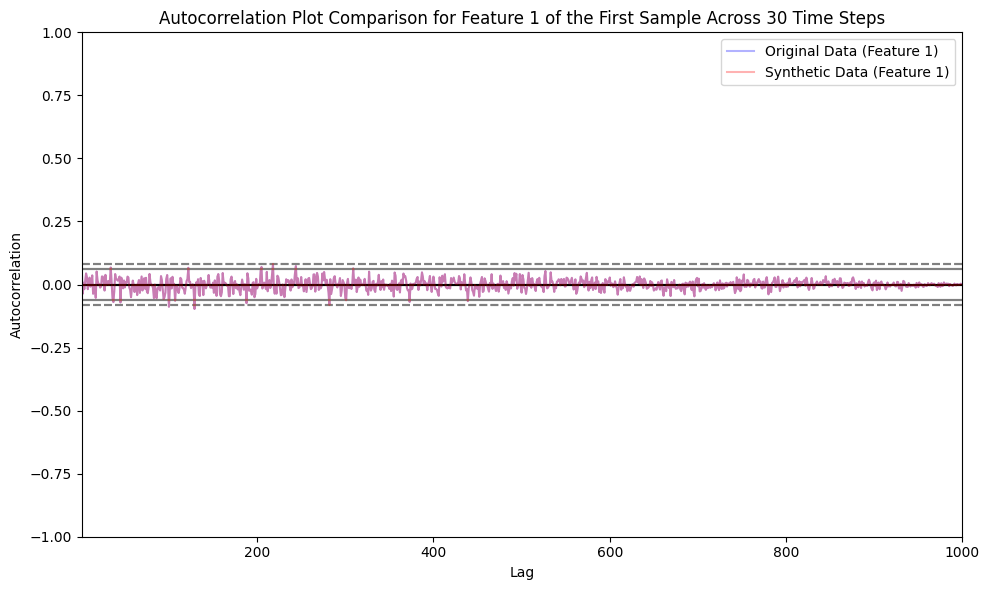

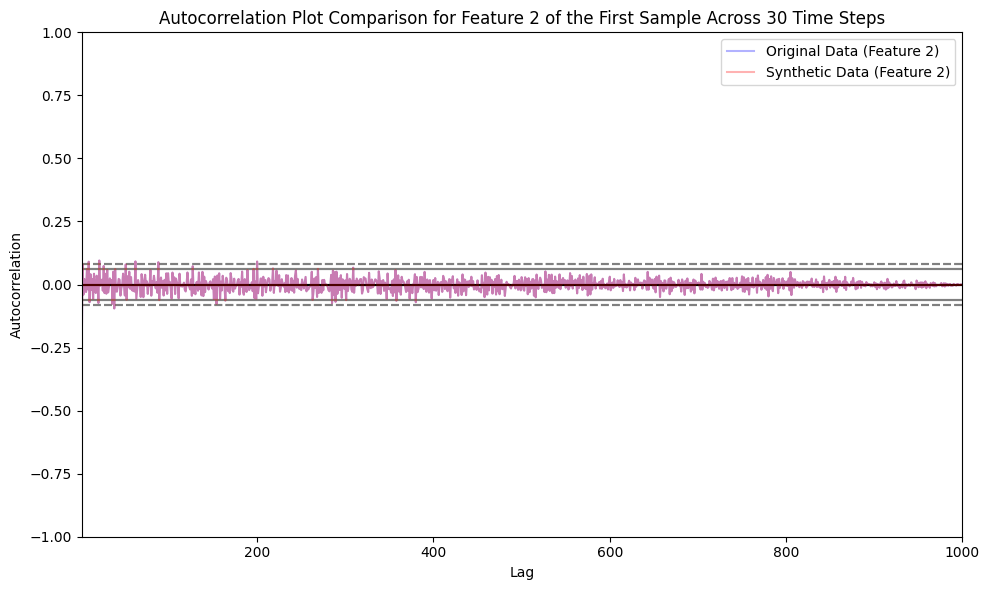

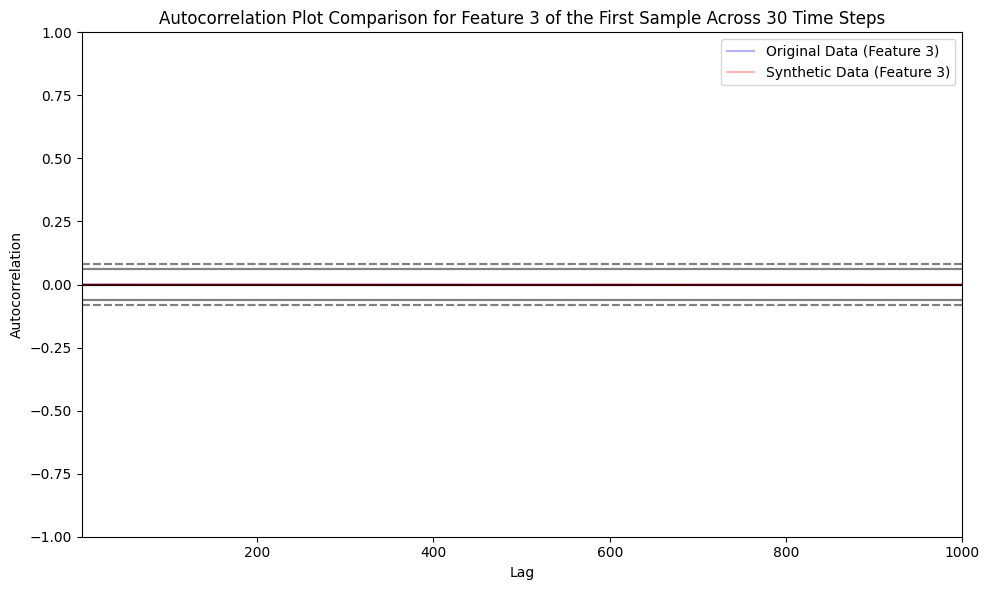

In [ ]:

#comparison test
#1 auto
# Adjust transparency and make use of the whole graph for the new data format

#for downsample
#downsampled_data[ :, 0]

#to_see0

#testing sine wave
# Generate a sine wave for testing

# Define parameters for the sine wave
num_points = 1000  # Number of discrete points
x = np.linspace(0, 2 * np.pi, num_points)  # Generate equally spaced points over one cycle
sin = np.sin(x)  # Compute sine values







import pandas as pd
y=10
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(pd.Series( to_see0  ), label='Original Data (Feature 1)',color='blue', alpha=0.3)
autocorrelation_plot( pd.Series(  to_see0  ), label='Synthetic Data (Feature 1)', color='red', alpha=0.3)

# Add legend and adjust layout for Feature 1
#plt.legend(['Original Data (Feature 1)', 'Synthetic Data (Feature 1)'])
plt.title('Autocorrelation Plot Comparison for Feature 1 of the First Sample Across 30 Time Steps')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
autocorrelation_plot(pd.Series(to_see1), label='Original Data (Feature 2)',color='blue', alpha=0.3)
autocorrelation_plot(pd.Series(to_see1), label='Synthetic Data (Feature 2)', color='red', alpha=0.3)

# Add legend and adjust layout for Feature 1
#plt.legend(['Original Data (Feature 2)', 'Synthetic Data (Feature 2)'])
plt.title('Autocorrelation Plot Comparison for Feature 2 of the First Sample Across 30 Time Steps')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
autocorrelation_plot(pd.Series( to_see2 ), label='Original Data (Feature 3)',color='blue', alpha=0.3)
autocorrelation_plot(pd.Series( to_see2 ), label='Synthetic Data (Feature 3)', color='red', alpha=0.3)

# Add legend and adjust layout for Feature 1
#plt.legend(['Original Data (Feature 3)', 'Synthetic Data (Feature 3)'])
plt.title('Autocorrelation Plot Comparison for Feature 3 of the First Sample Across 30 Time Steps')
plt.tight_layout()
plt.show()
